<a href="https://colab.research.google.com/github/laerteluizf/Proc_Imagens_2025_2/blob/main/proc_imagens_tarefa_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from google.colab.patches import cv2_imshow
from collections import deque

In [3]:
def mostrar_2(imagem_1, legenda_1, imagem_2, legenda_2):

  plt.figure(figsize=(10, 5))

  # Imagem 1
  plt.subplot(1, 2, 1)
  plt.imshow(imagem_1, cmap='gray')
  plt.title(legenda_1)
  plt.axis("off")

  # Imagem 2
  plt.subplot(1, 2, 2)
  plt.imshow(imagem_2, cmap='gray')
  plt.title(legenda_2)
  plt.axis("off")

  plt.show()


def mostrar_imagem_e_histograma(imagem, titulo_imagem):

    # Verifica a imagem
    if imagem is None:
        print("Erro: Não foi possível carregar a imagem.")
        return

    titulo_hist= f"Histograma da {titulo_imagem}"

    # Calcula histograma (1 canal, 256 níveis de cinza)
    hist = cv2.calcHist([imagem], [0], None, [256], [0, 256]).ravel()

    # Plotagem
    plt.figure(figsize=(12, 5))

    # Exibe a imagem
    plt.subplot(1, 2, 1)
    plt.imshow(imagem, cmap="gray")
    plt.title(titulo_imagem)
    plt.axis("off")

    # Exibe o histograma
    plt.subplot(1, 2, 2)
    plt.plot(hist, color='black')
    plt.title(titulo_hist)
    plt.xlabel("Intensidade (0–255)")
    plt.ylabel("Frequência")
    plt.xlim([0, 255])

    plt.show()

In [4]:
# Atividade 1 – Geradores de Ruído

def adicionar_ruido_gaussiano(imagem, media, variancia):

    # Verifica a imagem
    if imagem is None:
        print("Erro: Não foi possível carregar a imagem. Verifique o caminho.")
        return
    # Converte a imagem para float32 [0,1]
    imagem_norm = imagem.astype(np.float32) / 255.0

    # Calcula o desvio padrão
    sigma = np.sqrt(variancia)

    # Gera o ruído gaussiano
    ruido = np.random.normal(media, sigma, imagem_norm.shape)

    # Adiciona o ruído
    imagem_ruidosa = imagem_norm + ruido

    # Mantém os valores no intervalo [0,1]
    imagem_ruidosa = np.clip(imagem_ruidosa, 0, 1)

    legenda_imagem = "Imagem com Ruído Gaussiano"

    imagem_final = (imagem_ruidosa * 255).astype(np.uint8) # Converte de volta para uint8 [0,255]

    return imagem_final, legenda_imagem


def adicionar_ruido_sal_pimenta(imagem, p_sal, p_pimenta):

    # Verifica a imagem
    if imagem is None:
        print("Erro: Não foi possível carregar a imagem. Verifique o caminho.")
        return

    # Verifica probabilidades
    if p_sal < 0 or p_pimenta < 0 or p_sal + p_pimenta > 1:
        print("Erro: As probabilidades devem ser >= 0 e p_sal + p_pimenta <= 1.")
        return

    # Normaliza imagem para [0,1]
    imagem_norm = imagem.astype(np.float32) / 255.0

    # Gera matriz uniforme (0 a 1)
    r = np.random.rand(*imagem_norm.shape)

    # Cria cópia para receber o ruído
    imagem_ruidosa = imagem_norm.copy()

    # Aplica SAL (pixels brancos)
    imagem_ruidosa[r < p_sal] = 1.0

    # Aplica PIMENTA (pixels pretos)
    imagem_ruidosa[(r >= p_sal) & (r < p_sal + p_pimenta)] = 0.0

    # Recorta valores só por segurança
    imagem_ruidosa = np.clip(imagem_ruidosa, 0, 1)

    legenda_imagem = f"Imagem com Ruído Sal e Pimenta (p_sal={p_sal}, p_pimenta={p_pimenta})"

    # Converte de volta para uint8 [0,255]
    imagem_final = (imagem_ruidosa * 255).astype(np.uint8)

    return imagem_final, legenda_imagem

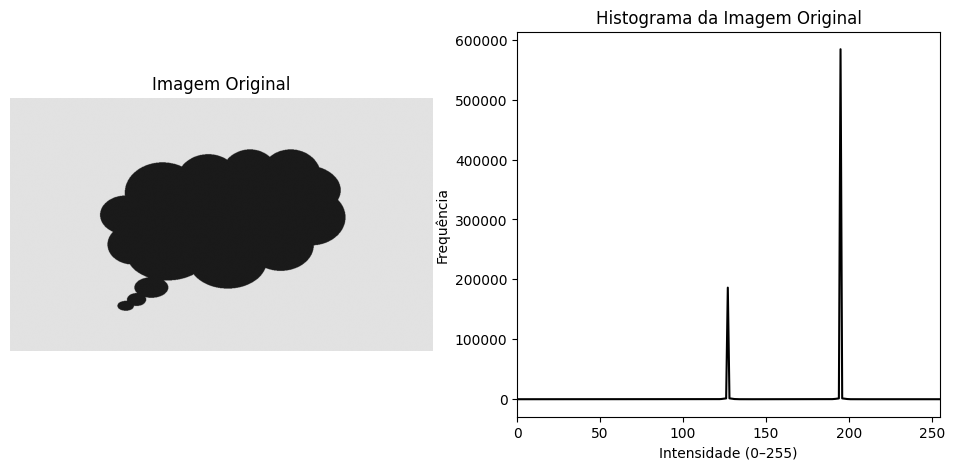

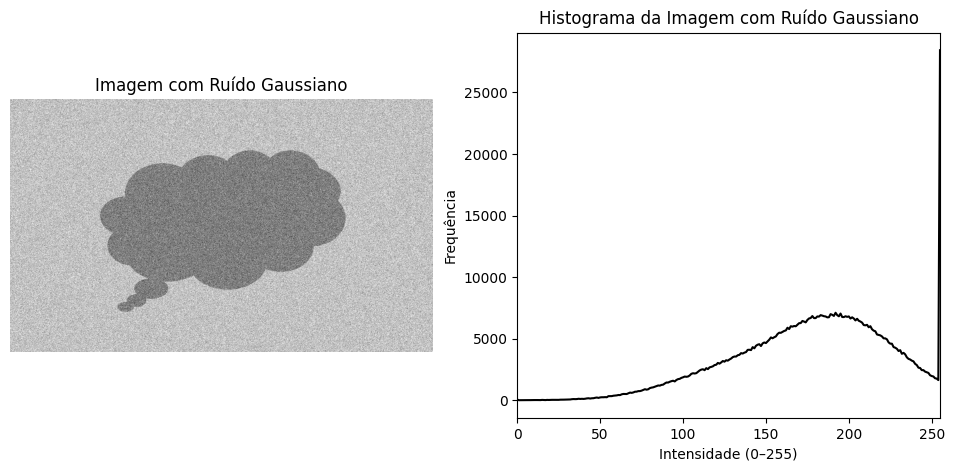

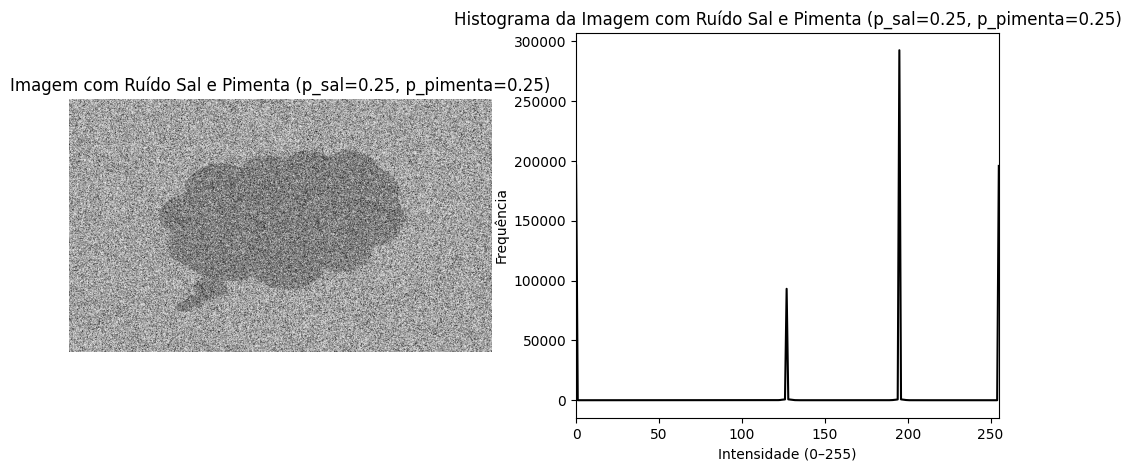

In [24]:
# Atividade 1 – Geradores de Ruído

caminho_imagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/imagem.jpg'

imagem_original = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)
legenda = "Imagem Original"

media = 0
variancia = 0.02
imagem_com_ruido_g , legenda_ruido_g = adicionar_ruido_gaussiano(imagem_original, media, variancia)

p_sal = 0.25       # 5% sal
p_pimenta = 0.25   # 5% pimenta
imagem_com_ruido_sp, legenda_ruido_sp = adicionar_ruido_sal_pimenta(imagem_original, p_sal, p_pimenta)

mostrar_imagem_e_histograma(imagem_original, legenda)
mostrar_imagem_e_histograma(imagem_com_ruido_g, legenda_ruido_g)
mostrar_imagem_e_histograma(imagem_com_ruido_sp, legenda_ruido_sp)

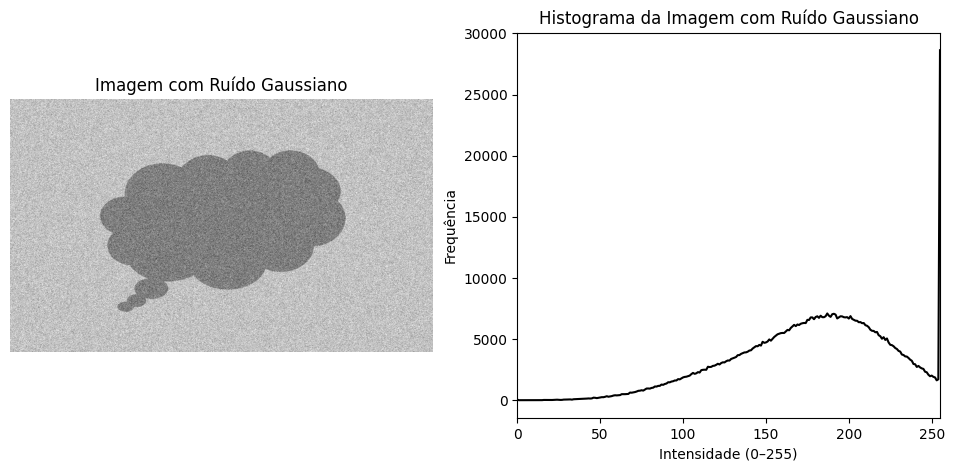

In [22]:

caminho_imagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/imagem.jpg'

imagem_original = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)
legenda = "Imagem Original"

media = 0
variancia = 0.02
imagem_com_ruido_g , legenda_ruido_g = adicionar_ruido_gaussiano(imagem_original, media, variancia)

mostrar_imagem_e_histograma(imagem_com_ruido_g, legenda_ruido_g)

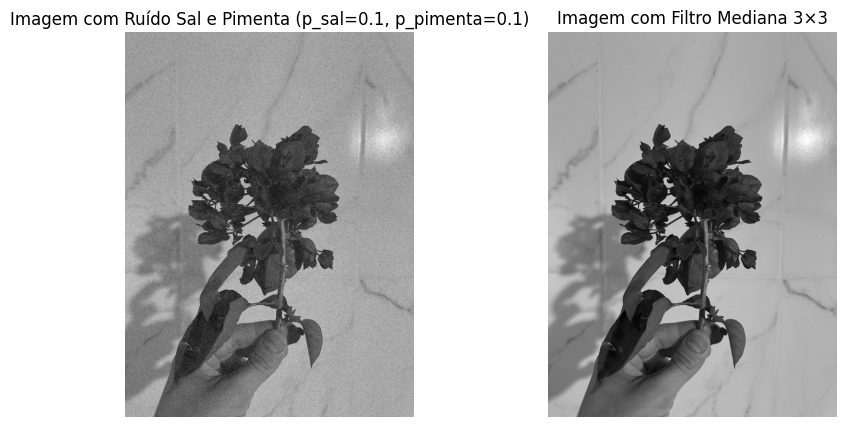

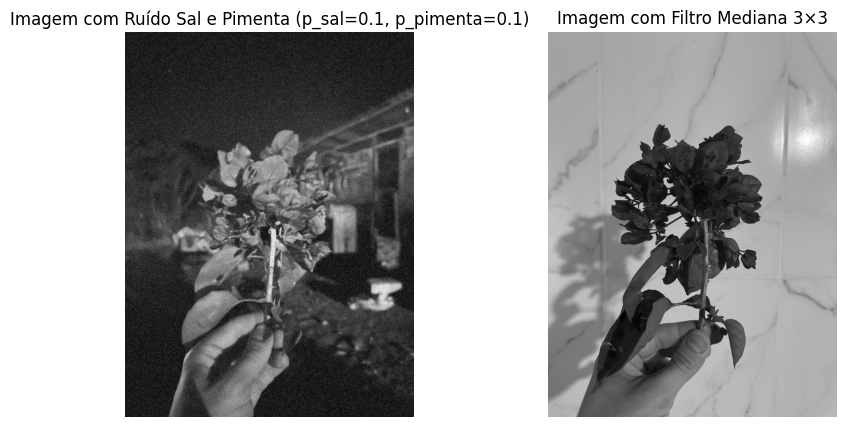

In [27]:
# Atividade 2 – Redução de Ruído Usando um Filtro Mediano

caminho_imagem_1 = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/flor_i_d_5.jpeg'
caminho_imagem_2 = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/flor_o_n_5.jpeg'

imagem_orinal_1 = cv2.imread(caminho_imagem_1, cv2.IMREAD_GRAYSCALE)
imagem_orinal_2 = cv2.imread(caminho_imagem_2, cv2.IMREAD_GRAYSCALE)

p_sal = 0.1       # 20% sal
p_pimenta = 0.1   # 20% pimenta

imagem_com_ruido_1, legenda_ruido_1 = adicionar_ruido_sal_pimenta(imagem_orinal_1, p_sal, p_pimenta)
imagem_com_ruido_2, legenda_ruido_2 = adicionar_ruido_sal_pimenta(imagem_orinal_2, p_sal, p_pimenta)

kernel = 3
imagem_filtrada_1 = cv2.medianBlur(imagem_com_ruido_1, kernel)
imagem_filtrada_2 = cv2.medianBlur(imagem_filtrada_1, kernel)

legenda_filtrada = f"Imagem com Filtro Mediana {kernel}×{kernel}"

mostrar_2(imagem_com_ruido_1, legenda_ruido_1, imagem_filtrada_1, legenda_filtrada)
mostrar_2(imagem_com_ruido_2, legenda_ruido_2, imagem_filtrada_2, legenda_filtrada)

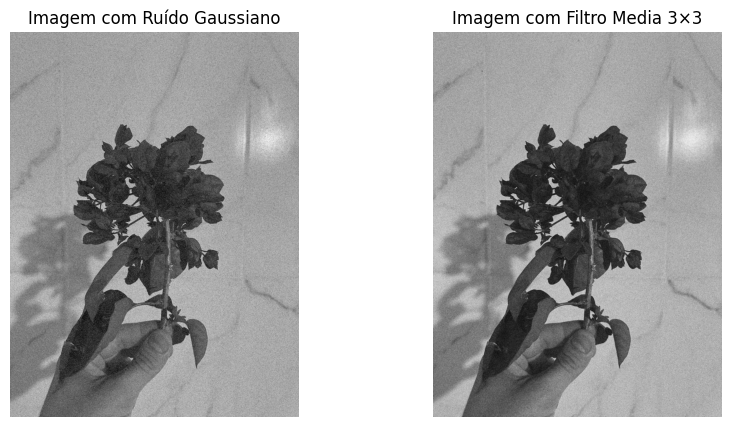

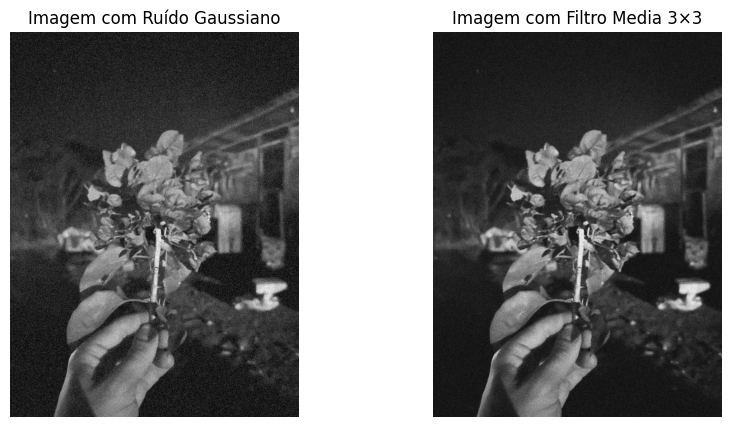

In [28]:
# Atividade 3 – Redução de Ruído Usando um Filtro da Média

caminho_imagem_1 = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/flor_i_d_5.jpeg'
caminho_imagem_2 = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/flor_o_n_5.jpeg'

imagem_orinal_1 = cv2.imread(caminho_imagem_1, cv2.IMREAD_GRAYSCALE)
imagem_orinal_2 = cv2.imread(caminho_imagem_2, cv2.IMREAD_GRAYSCALE)

media = 0
variancia = 0.05

imagem_com_ruido_g_1 , legenda_ruido_g_1 = adicionar_ruido_gaussiano(imagem_orinal_1, media, variancia)
imagem_com_ruido_g_2 , legenda_ruido_g_2 = adicionar_ruido_gaussiano(imagem_orinal_2, media, variancia)

kernel = 3
imagem_filtrada_1 = cv2.blur(imagem_com_ruido_g_1, (kernel,kernel))
imagem_filtrada_2 = cv2.blur(imagem_com_ruido_g_2, (kernel,kernel))

legenda_filtrada = f"Imagem com Filtro Media {kernel}×{kernel}"

mostrar_2(imagem_com_ruido_1, legenda_ruido_g_1, imagem_filtrada_1, legenda_filtrada)
mostrar_2(imagem_com_ruido_2, legenda_ruido_g_2, imagem_filtrada_2, legenda_filtrada)





In [12]:
def determinacao_bordas_alg(imagem, limiar):

    if imagem is None:
        print("Erro: imagem inválida.")
        return

    # Conversão para float para evitar overflow
    imagem = imagem.astype(np.float32)

    num_linhas, num_colunas = imagem.shape

    # Máscaras de Sobel
    sobel_x = np.array([[-1,  0,  1],
                        [-2,  0,  2],
                        [-1,  0,  1]], dtype=np.float32)

    sobel_y = np.array([[ 1,  2,  1],
                        [ 0,  0,  0],
                        [-1, -2, -1]], dtype=np.float32)

    # Imagem binária de saída (bordas)
    bordas = np.zeros((num_linhas, num_colunas), dtype=np.uint8)

    # Implementação do algoritmo
    for linha in range(1, num_linhas - 1):
        for coluna in range(1, num_colunas - 1):

            # Vizinhança 3x3
            regiao = imagem[linha-1:linha+2, coluna-1:coluna+2]

            # Gradientes
            grad_x = np.sum(regiao * sobel_x)
            grad_y = np.sum(regiao * sobel_y)

            # Magnitude aproximada do gradiente
            magnitude = abs(grad_x) + abs(grad_y)

            # Limiarização
            if magnitude > limiar:
                bordas[linha, coluna] = 255

    legenda = f"bordas (algoritmo 1 - sobel | limiar = {limiar})"
    return bordas, legenda

In [13]:
caminho_imagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/carro_o_d_5.jpeg'

imagem_orinal = cv2.imread(caminho_imagem, cv2.COLOR_BGR2GRAY)
legenda = "Imagem Original"

resized_img = cv2.resize(imagem_orinal, (0, 0), fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)

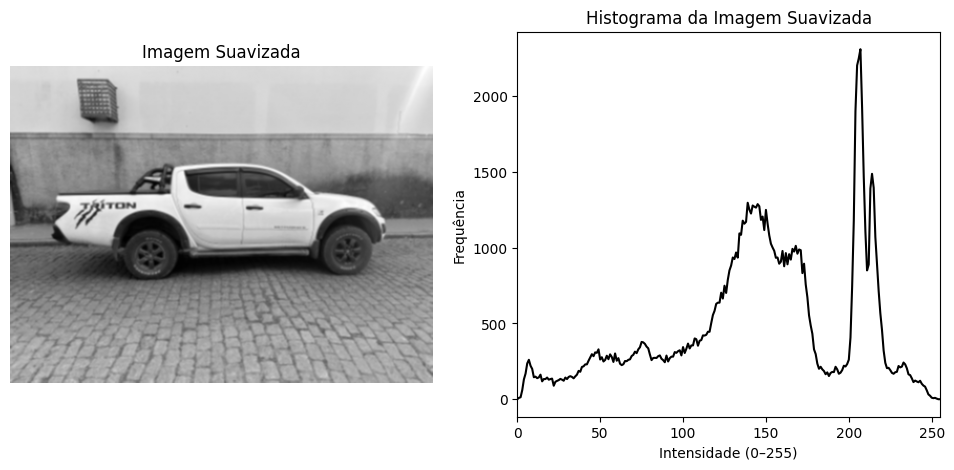

In [14]:
img_suave = cv2.GaussianBlur(resized_img, (3,3), 0)
legenda_suave = "Imagem Suavizada"

mostrar_imagem_e_histograma(img_suave, legenda_suave)

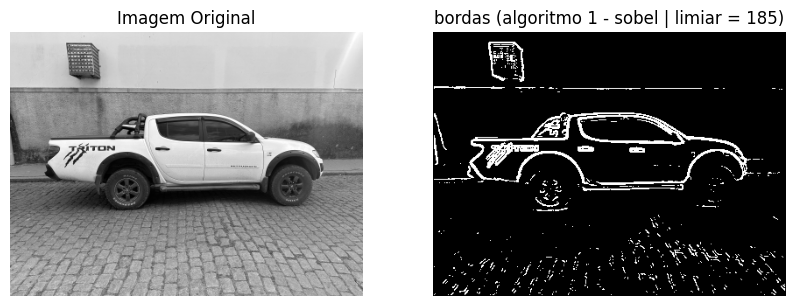

In [15]:
te = 185

imagem_bordas , legenda_bordas = determinacao_bordas_alg(img_suave, te)

mostrar_2(resized_img, legenda , imagem_bordas, legenda_bordas)


In [16]:
#Atividade 5 - Limiarização Global

def limiarizacao_global_iterativa(imagem, tolerancia=1):

    if imagem is None:
        print("Erro: imagem inválida.")
        return

    # Selecionar estimativa inicial para T
    t_limiar = np.mean(imagem)

    while True:
        # Segmentar em dois grupos
        G1 = imagem[imagem > t_limiar]      # pixels maiores que T
        G2 = imagem[imagem <= t_limiar]     # pixels menores ou iguais a T

        # Evita erro se algum grupo ficar vazio
        if len(G1) == 0 or len(G2) == 0:
            break

        # Calcular m1 e m2
        m1 = np.mean(G1)
        m2 = np.mean(G2)

        # Calcular novo limiar
        t_limiar_novo = 0.5 * (m1 + m2)

        # Verificar convergência
        if abs(t_limiar_novo - t_limiar) < tolerancia:
            t_limiar = t_limiar_novo
            break

        t_limiar = t_limiar_novo

    # Criar imagem binária final
    binaria = np.zeros_like(imagem, dtype=np.uint8)
    binaria[imagem > t_limiar] = 255

    legenda = f"Limiarização Global Iterativa (t = {int(t_limiar)})"

    return binaria, legenda

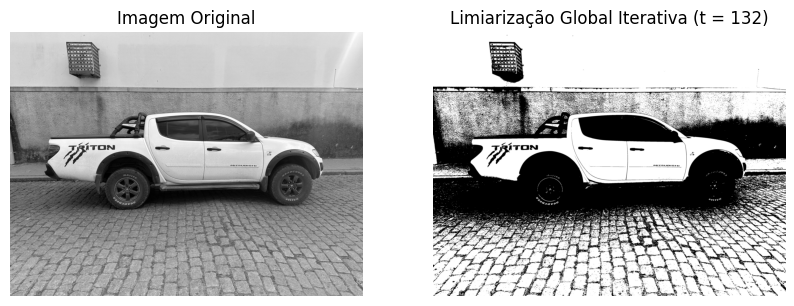

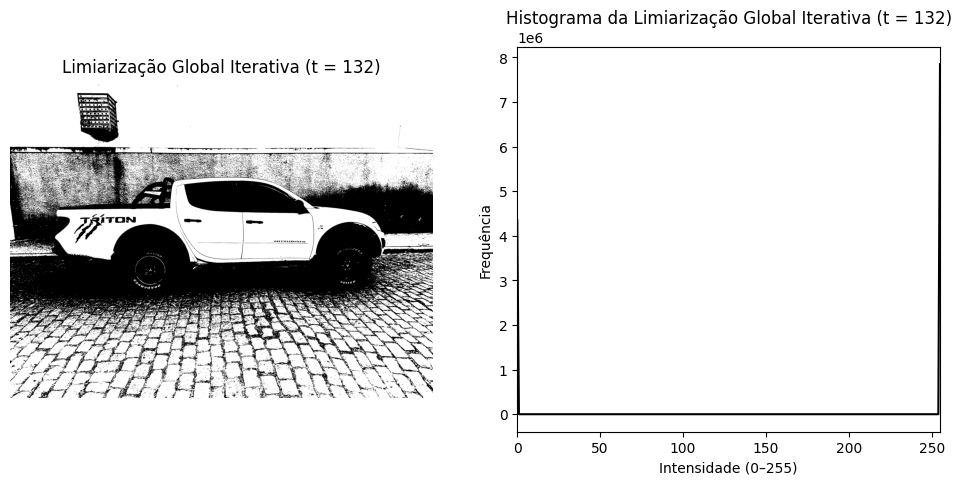

In [29]:
caminho_imagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/carro_o_d_5.jpeg'

imagem_orinal = cv2.imread(caminho_imagem, cv2.COLOR_BGR2GRAY)
legenda = "Imagem Original"

img_suave = cv2.GaussianBlur(imagem_orinal, (3,3), 0)
legenda_suave = "Imagem Suavizada"

imagem_bordas, legenda_bordas = limiarizacao_global_iterativa(img_suave, tolerancia=1)

mostrar_2(imagem_orinal, legenda , imagem_bordas, legenda_bordas)

mostrar_imagem_e_histograma(imagem_bordas, legenda_bordas)

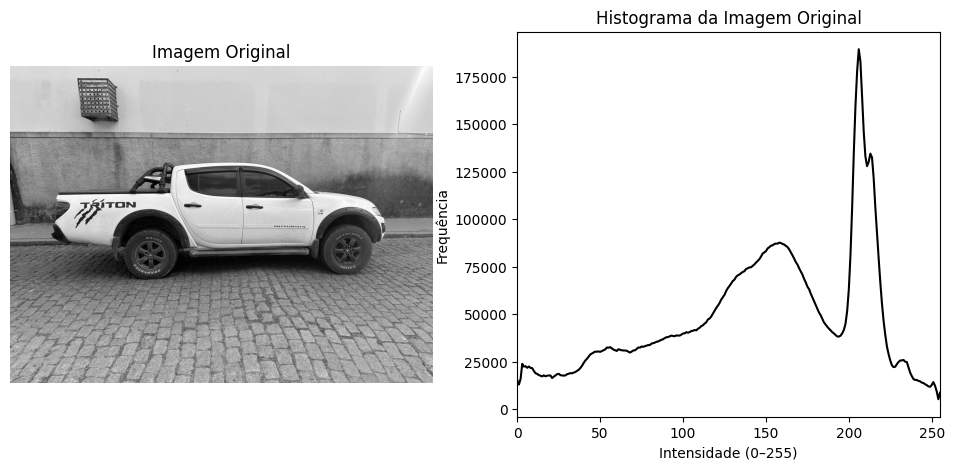

In [ ]:
mostrar_imagem_e_histograma(imagem_orinal, legenda)

In [18]:
# Atividade 6 - Limiarização Ótima

def otsu_threshold(imagem):

    # Garante que a imagem é 8-bit
    if imagem.dtype != np.uint8:
        imagem = imagem.astype(np.uint8)

    # Histograma (256 intensidades)
    hist = np.bincount(imagem.flatten(), minlength=256)
    total = imagem.size

    # Probabilidade de cada intensidade
    prob = hist / total

    # Variáveis auxiliares
    soma_total = np.sum(np.arange(256) * prob)
    peso_b = 0.0
    soma_b = 0.0
    var_max = 0.0
    limiar_otimo = 0

    # Loop sobre todos os limiares possíveis
    for t in range(256):
        peso_b += prob[t]          # peso da classe 1 (<= t)
        if peso_b == 0:
            continue
        peso_f = 1 - peso_b        # peso da classe 2 (> t)
        if peso_f == 0:
            break

        soma_b += t * prob[t]

        m1 = soma_b / peso_b       # média da classe 1
        m2 = (soma_total - soma_b) / peso_f  # média da classe 2

        # Variância entre classes
        var_entre_classes = peso_b * peso_f * (m1 - m2) ** 2

        # Atualiza se encontrar variância melhor
        if var_entre_classes > var_max:
            var_max = var_entre_classes
            limiar_otimo = t

    # Aplica limiarização
    binaria = np.zeros_like(imagem, dtype=np.uint8)
    binaria[imagem > limiar_otimo] = 255

    legenda = f"Limiarização Ótima de Otsu (T = {limiar_otimo})"

    return binaria, legenda


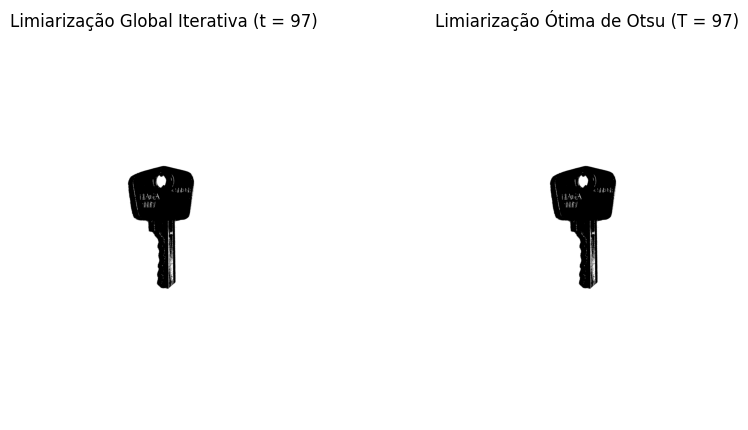

In [31]:
caminho_imagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/chave_i_d_5.jpeg'

#caminho_imgagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Atividade 6/FIG033~4.TIF'

imagem_ori = cv2.imread(caminho_imagem, cv2.COLOR_BGR2GRAY)
#imagem_ori = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)

legenda = "Imagem Original"

imagem_bordas, legenda_borda = limiarizacao_global_iterativa(imagem_ori, tolerancia=1)

imagem_bordas_2, legenda_borda_2 = otsu_threshold(imagem_ori)

mostrar_2(imagem_bordas, legenda_borda, imagem_bordas_2, legenda_borda_2)

In [ ]:
def crescimento_regiao(imagem, seed, limiar):
    """
    Segmentação por crescimento de região.

    Parâmetros:
        imagem : matriz 2D em escala de cinza (uint8)
        seed   : tupla (linha, coluna) marcando o ponto inicial
        limiar : valor máximo de diferença permitida

    Retorna:
        regiao  : imagem binária (0 e 255)
        legenda : texto descritivo
    """

    # Dimensões da imagem
    linhas, colunas = imagem.shape

    # Matrizes de estado
    visitado = np.zeros_like(imagem, dtype=np.uint8)
    regiao = np.zeros_like(imagem, dtype=np.uint8)

    # Semente (ponto inicial)
    linha_seed, coluna_seed = seed

    # Inicialização
    fila = deque()
    fila.append((linha_seed, coluna_seed))

    visitado[linha_seed, coluna_seed] = 1
    regiao[linha_seed, coluna_seed] = 255

    soma_intensidade = np.int64(imagem[linha_seed, coluna_seed])
    contador_pixels = 1

    # 4 vizinhos
    vizinhos = [(1,0), (-1,0), (0,1), (0,-1)]

    # Loop principal
    while fila:
        linha_atual, coluna_atual = fila.popleft()

        media_regiao = soma_intensidade / contador_pixels

        for dx, dy in vizinhos:
            linha_viz = linha_atual + dx
            coluna_viz = coluna_atual + dy

            # Checagem de bordas da imagem
            if (linha_viz < 0 or linha_viz >= linhas or
                coluna_viz < 0 or coluna_viz >= colunas):
                continue

            if visitado[linha_viz, coluna_viz] == 1:
                continue

            intensidade_viz = int(imagem[linha_viz, coluna_viz])

            # Critério de inclusão na região
            if abs(intensidade_viz - media_regiao) <= limiar:
                regiao[linha_viz, coluna_viz] = 255
                soma_intensidade += intensidade_viz
                contador_pixels += 1
                fila.append((linha_viz, coluna_viz))

            visitado[linha_viz, coluna_viz] = 1

    legenda = f"Crescimento de Região (seed={seed}, limiar={limiar})"
    return regiao, legenda


In [ ]:
def segmentar_regioes_escuras(imagem, R0=60, valor_segmento=0.5):
    import numpy as np

    # Verificação da imagem
    if imagem is None:
        print("Erro: Não foi possível carregar a imagem. Verifique o caminho.")
        return

    # Normaliza imagem [0,1]
    imagem_norm = imagem.astype(np.float32) / 255.0

    # Define centro da região escura (preto)
    centro = np.array([0.0, 0.0, 0.0], dtype=np.float32)

    # Calcula distância euclidiana RGB dist(x,y) = sqrt( (R-0)^2 + (G-0)^2 + (B-0)^2 )
    dist = np.linalg.norm(imagem_norm - centro, axis=2)

    # Gera máscara de regiões escuras
    # R0 controla "o quão escuro" conto como alvo
    mascara = dist <= (R0 / 255.0)

    # Cria cópia para resultado
    imagem_segmentada = imagem_norm.copy()

    # Aplica valor cinza 0.5 (como no Exemplo 6.15)
    imagem_segmentada[mascara] = valor_segmento

    # Garante intervalo [0,1]
    imagem_segmentada = np.clip(imagem_segmentada, 0, 1)

    # Converte para uint8
    imagem_final = (imagem_segmentada * 255).astype(np.uint8)

    legenda = (
        f"Segmentação das regiões escuras no espaço RGB (R0={R0}, valor_segmento={valor_segmento})"
    )

    return imagem_final, legenda


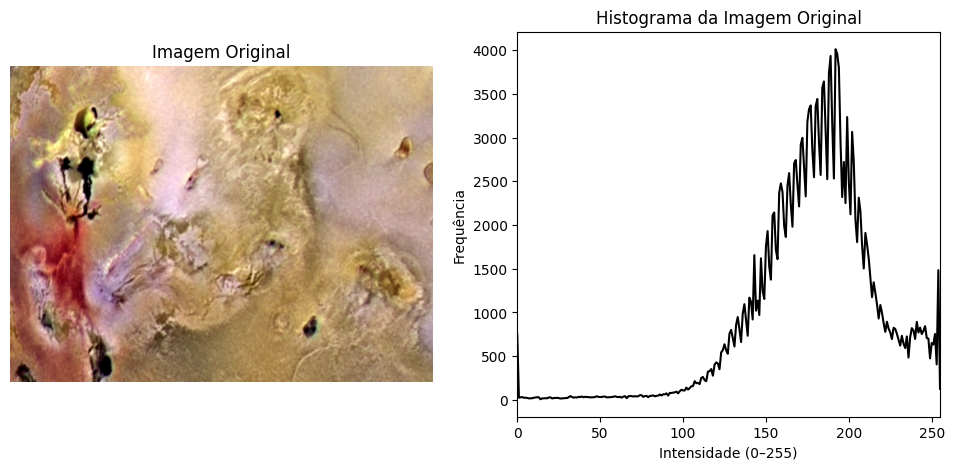

NameError: name 'segmentar_regioes_escuras' is not defined

In [20]:
caminho_imgagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Color/6-28.TIF'

imagem_ori = cv2.imread(caminho_imgagem, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(imagem_ori, cv2.COLOR_BGR2RGB)



legenda = "Imagem Original"

mostrar_imagem_e_histograma(img_rgb, legenda)

R0 = 60
valor_segmento = 1

regiao, legenda = segmentar_regioes_escuras(img_rgb, R0, valor_segmento)

mostrar_2(img_rgb, legenda, regiao, legenda)

